In [77]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
css_color = mcolors.CSS4_COLORS
# https://matplotlib.org/stable/gallery/color/named_colors.html
def draw(colors, title, sort_colors=True, emptycols=0):
    print(title, len(colors))
    
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name+colors[name], fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig


new 110
remove 38


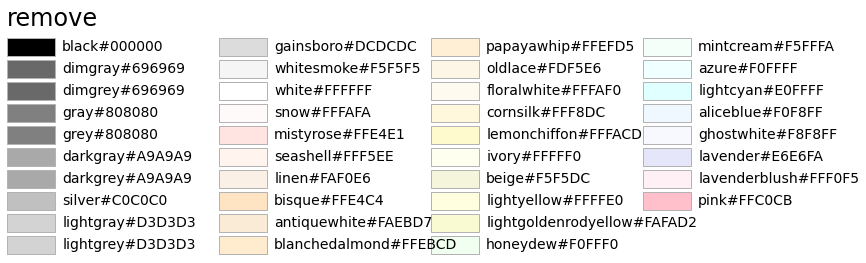

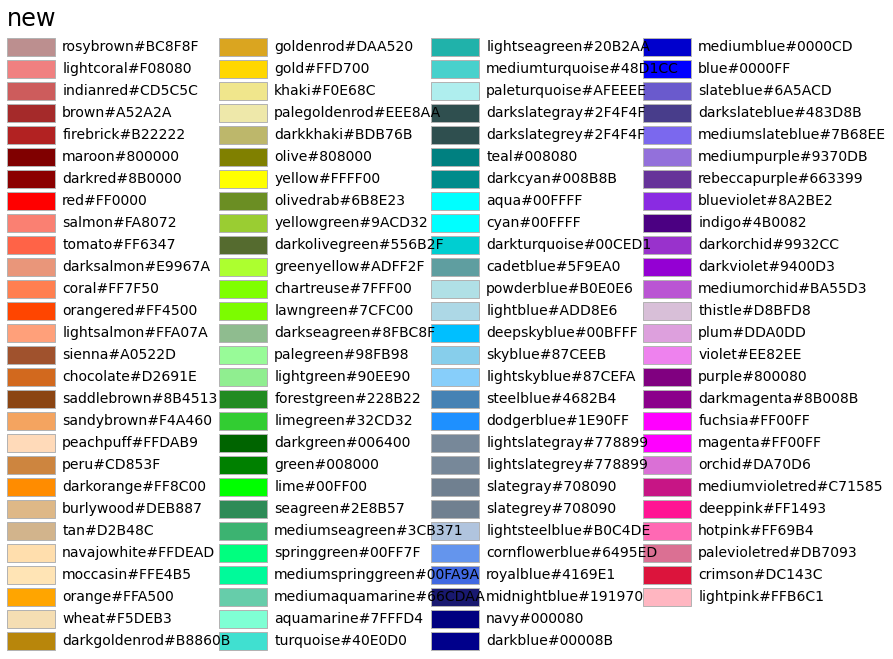

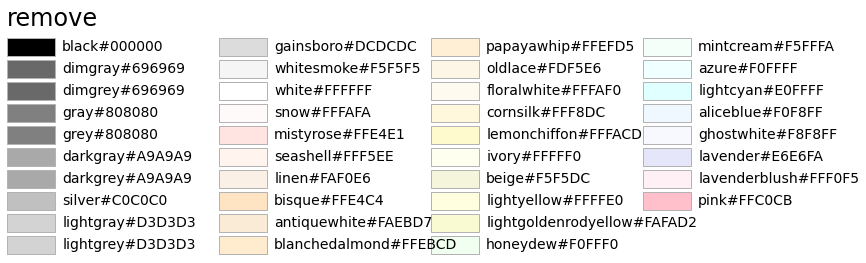

In [78]:
new = dict()
import re
gray = re.compile(r'#(..)\1\1')
light = re.compile(r'#[CDEF].[CDEF].[CDEF]')
remove = dict()
for name, value in css_color.items():
    if re.search(gray, value) is not None:
        remove[name] = value
    elif re.search(light, value) is not None:
        remove[name] = value
    else:
        new[name] = value

draw(new, 'new')
draw(remove, 'remove')


{'Cycadaceae': '', 'Araucariaceae': '', 'Taxaceae': '', 'Cupressaceae': '', 'Araucaria': '', 'Canellaceae': '', 'Schisandraceae': '', 'Trimeniaceae': '', 'Chloranthaceae': '', 'Pinus': '', 'Nymphaeaceae': '', 'Ranunculales': '', 'Monocots': '', 'Annonaceae': '', 'Eupomatiaceae': '', 'Magnoliaceae': '', 'Proteales': '', 'Laurales': '', 'Hernandiaceae': '', 'Lauraceae': '', 'Monimiaceae': '', 'Buxales': '', 'Saxifragales': '', 'Cornales': '', 'Ericales': '', 'Clusiaceae': '', 'Arecales': '', 'Hamamelidoideae': '', 'Myrtaceae': '', 'Actinidiaceae': '', 'Juglandaceae': '', 'Paracryphiaceae': '', 'Zingiberales': '', 'Asteraceae': '', 'Rhamnaceae': '', 'Cannabaceae': '', 'Sabiaceae': '', 'Rutaceae': '', 'Elaeocarpaceae': '', 'Thuja': '', 'Rhododendron': '', 'Vitaceae': '', 'Dioon': '', 'Torricelliaceae': '', 'Sapindaceae': '', 'Physalis': '', 'Prunus': '', 'Anacardium': '', 'Meliaceae': '', 'Tapisciaceae': '', 'Lepidozamia': ''}
use 51
{'name': 'Cycadaceae', 'species': 'Cycas revoluta Thunb.

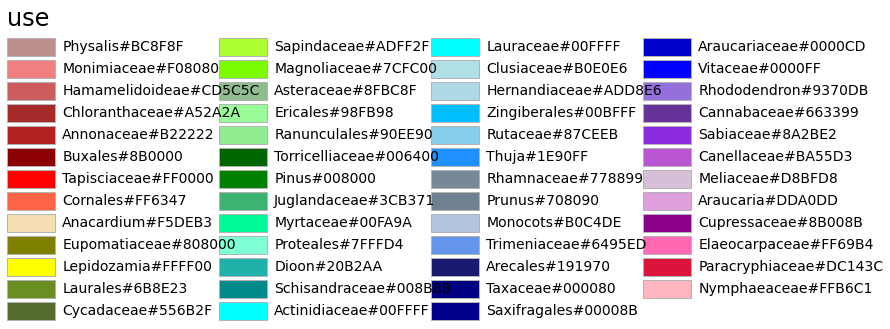

In [79]:
import json
with open('./map_color.json', 'r', encoding='utf-8') as f:
    old = json.load(f)
from random import choice
name_color = {i['name']: '' for i in old}
print(name_color)
new_c = list(new.values())
for name in name_color:
    color = choice(new_c)
    new_c.remove(color)
    name_color[name] = color
draw(name_color, 'use')
result = list()
for record in old:
    record['color'] = name_color[record['name']]
    result.append(record)
print(result[0])

In [80]:
with open('map_color-new.json', 'w', encoding='utf-8') as f:
    json.dump(result, f, indent=4)